<h1>Fraud is bad. Don't commit no fraud</h1>



1.   Data Import
2.   Exploratory Data Analysis






# Data Import

In [2]:
# importing all the python libraries we will use
import pathlib
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np

df_fraud = pd.read_csv('fraud_oracle.csv')
df_fraud_backup = df_fraud.copy()

### Exploratory Data Analysis ###


* Number of variables
* Data types
* Class distribution of the variables
* Data quality check
* Feature engineering





In [3]:
# size of the dataset
df_fraud.shape

(15420, 33)

In [ ]:
# first look at the data
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
# variable type breakdown and count
df_fraud.dtypes.value_counts()

object    24
int64      9
dtype: int64

In [ ]:
# we have 33 variables: 24 categorical and 9 numerical

# list of categorical variables
df_fraud.columns[df_fraud.dtypes == 'object']

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [ ]:
# list of numerical variables
df_fraud.columns[df_fraud.dtypes == 'int64']

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [ ]:
# Now, let's take a look at the target variable, FraudFound_P
# Lets see the breakdown of classes for FraudFound_P

fraud_cases = pd.DataFrame(df_fraud['FraudFound_P'].value_counts())
fraud_cases['Percentage'] = round(df_fraud['FraudFound_P'].value_counts(normalize=True) * 100, 2)
fraud_cases = fraud_cases.rename(columns={'FraudFound_P': 'Claims'})
fraud_cases

,Claims,Percentage
0,14497,94.01
1,923,5.99


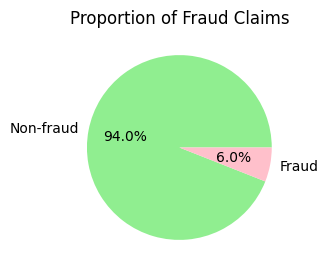

In [ ]:
# Lets make a pie chart to vizualize this imbalance:

import matplotlib.pyplot as plt

# Proportion of fraud claims
fig, ax = plt.subplots(figsize=(4, 3))
fraud_proportion = df_fraud['FraudFound_P'].value_counts(normalize=True)
fraud_proportion.plot.pie(labels=['Non-fraud', 'Fraud'], autopct='%1.1f%%', ax=ax, colors=['lightgreen', 'pink'])  # Specify the axis using ax=ax

# Remove y-axis label
ax.set_ylabel('')

plt.title('Proportion of Fraud Claims')
plt.show()

## Overview of the variables

#### Number of variables

In total, there are 33 variables:
- 32 input variables
- 1 Output Variable

#### Data Types

- Numeric (int64) - 9
- Binary (Object) - 24

#### Target Variable
-  `FraudFound_P`
- Numeric
- Binary (0/1)
- Class Distribution: imbalanced (6% Fraud vs 94% Non-fraud)

**IMPORTANT:** The dataset is imbalanced. There are 5.99% fraud cases vs 94.01% non-fraud ones. In absolute numbers, we have 923 fraud cases vs 14,497 non-fraud cases. To deal with the imbalance, we will try some balancing technique:  'oversampling' of the minority class (fraud) or 'undersampling' of the majority class (no fraud) or both at the same time

In [ ]:
# As seen above, only the Age variable appears to be a true numeric variable. All others can  be converted into object/categorical variables.
# Let's take a closer look at Age variable

In [ ]:
df_fraud['Age'].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

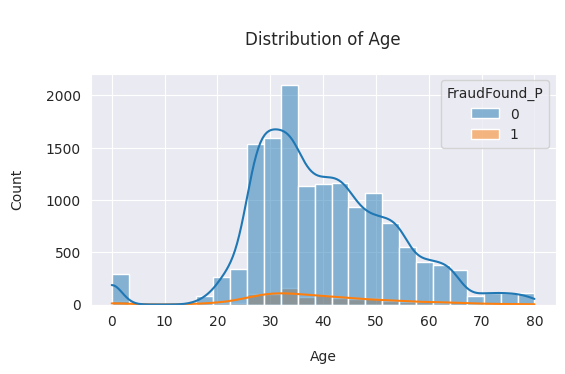

In [ ]:
# The minimum value of A is 0 which does not seem correct so lets take a closer look at it and see its distribution

# Plot the distribution:
plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.histplot(data=df_fraud, x='Age', color='teal', kde=True, bins=25, hue='FraudFound_P')
plt.title('\nDistribution of Age\n')
plt.xlabel('\nAge')
plt.ylabel('Count\n')
plt.show()

In [ ]:
# So how many data points are there with Age == 0
df_fraud[df_fraud['Age'] == 0][['Age', 'FraudFound_P']].value_counts()


Age  FraudFound_P
0    0               289
     1                31
dtype: int64

In [ ]:
# We have a total of 320 cases where Age = 0. 31 of them are Fraud vases vs 289 non-Fraud cases.
# Need to replace Age values that are currently 0. First replace them with NaN, than impute with median for Age for FraudFound_P == 0:

df_fraud['Age'] = df_fraud['Age'].replace(0, float('nan'))

# Calculate the median of 'Age' for non-fraudulent cases
median_age_non_fraud = df_fraud[df_fraud['FraudFound_P'] == 0]['Age'].median()

# Fill NaN values in 'Age' with the calculated median
df_fraud['Age'].fillna(median_age_non_fraud, inplace=True)


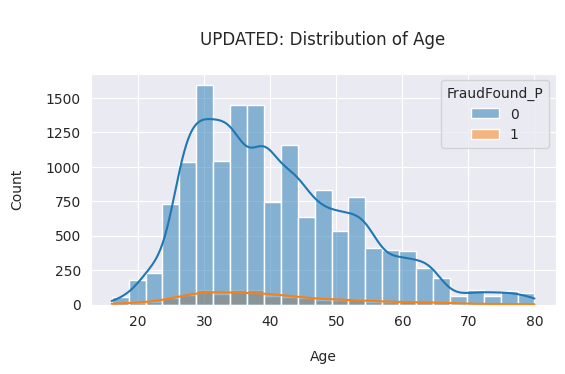

In [ ]:
# Replot the distribution:
plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.histplot(data=df_fraud, x='Age', color='teal', kde=True, bins=25, hue='FraudFound_P')
plt.title('\nUPDATED: Distribution of Age\n')
plt.xlabel('\nAge')
plt.ylabel('Count\n')
plt.show()

In [ ]:
# recoding Age into Age_Bracket. We will assume AgeOfPolicyHolder is a different variable
bins = [16, 18, 21, 26, 31, 36, 41, 51, 66, 100]
labels = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']

df_fraud['Age_Bracket'] = pd.cut(df_fraud['Age'], bins=bins, labels=labels, right=False)
df_fraud['Age_Bracket'] = df_fraud['Age_Bracket'].astype('object')


In [ ]:
df_fraud[['Age', 'AgeOfPolicyHolder', 'Age_Bracket']].head(10)

,Age,AgeOfPolicyHolder,Age_Bracket
0,21.0,26 to 30,21 to 25
1,34.0,31 to 35,31 to 35
2,47.0,41 to 50,41 to 50
3,65.0,51 to 65,51 to 65
4,27.0,31 to 35,26 to 30
5,20.0,21 to 25,18 to 20
6,36.0,36 to 40,36 to 40
7,39.0,16 to 17,36 to 40
8,30.0,31 to 35,26 to 30
9,42.0,36 to 40,41 to 50


In [ ]:
# exploring similar columns ['BasePolicy','PolicyType', 'VehicleCategory']

df_fraud[df_fraud['VehicleCategory'] == 'Sport'][['VehicleCategory', 'BasePolicy', 'PolicyType']]



,VehicleCategory,BasePolicy,PolicyType
0,Sport,Liability,Sport - Liability
1,Sport,Collision,Sport - Collision
2,Sport,Collision,Sport - Collision
3,Sport,Liability,Sedan - Liability
4,Sport,Collision,Sport - Collision
...,...,...,...
15402,Sport,Liability,Sedan - Liability
15407,Sport,Liability,Sedan - Liability
15412,Sport,Liability,Sedan - Liability
15413,Sport,Liability,Sedan - Liability


In [ ]:
# creating a new variable that is a combo of VehicleCategory' and 'BasePolicy'
# we are assuming its actually different from 'PolicyType' so we are keeping that one too

df_fraud['VehicleCategory_BasePolicy'] = df_fraud['VehicleCategory'] + ' - ' + df_fraud['BasePolicy']

In [ ]:
# dropping the old ''PolicyType':
#df_fraud['PolicyType_New'] = df_fraud['VehicleCategory'] + ' - ' + df_fraud['BasePolicy']
#df_fraud = df_fraud.drop(['PolicyType'], axis = 1)

In [ ]:
# dropping other irrelevant columns
df_fraud = df_fraud.drop(['PolicyNumber'], axis = 1)
 #'DayOfWeekClaimed', 'MonthClaimed', 'Year', 'AgeOfPolicyHolder', 'Month', 'WeekOfMonth', 'WeekOfMonthClaimed',


In [ ]:
df_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Age_Bracket,VehicleCategory_BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,No,External,none,1 year,3 to 4,1994,Liability,21 to 25,Sport - Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,31 to 35,Sport - Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,41 to 50,Sport - Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,51 to 65,Sport - Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,26 to 30,Sport - Collision


In [ ]:
# converting numerical to categorical varialbes. Leaving FraudFound_P as is.
df_fraud[['Deductible', 'DriverRating', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Year', 'RepNumber']] = \
df_fraud[['Deductible', 'DriverRating', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Year', 'RepNumber']].astype(str)


In [ ]:
df_fraud.select_dtypes(include='int64').head(5)

,FraudFound_P
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

In [ ]:
for col in df_fraud.columns:
    if (col != 'FraudFound_P' and col !='Age'):
        sns.set_style('darkgrid')

        # Create a DataFrame for count and percentage of fraud cases
        fraud_cases = pd.DataFrame(df_fraud.groupby([col, 'FraudFound_P']).size(), columns=['Count']).reset_index()
        total_counts = fraud_cases.groupby(col)['Count'].transform('sum')
        fraud_cases['Percentage of Fraud'] = round(fraud_cases['Count'] / total_counts * 100, 2)


        if (fraud_cases['FraudFound_P'] == 1).any():
            total_fraud_cases = fraud_cases[fraud_cases['FraudFound_P'] == 1]['Count'].sum()
            fraud_cases.loc[fraud_cases['FraudFound_P'] == 1, 'Percentage of Total Fraud Cases'] = round(fraud_cases['Count'] / total_fraud_cases * 100, 2)

        fraud_cases = fraud_cases.sort_values(by=['FraudFound_P', 'Percentage of Fraud', col], ascending=[False, False, True])

        # Print the fraud_cases DataFrame
        print(fraud_cases.to_string(index=False))

        # Plot three graphs:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        # Plot 1: the count of FraudFound_P (both 0 and 1) for each category of a given variable
        plt.subplot(1, 3, 1)
        order = df_fraud[df_fraud['FraudFound_P'] == 1][col].value_counts().index
        ax = sns.countplot(data=df_fraud, x=col, hue='FraudFound_P', palette='Blues', dodge=False, order=order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'Total # of Claims by {col}')

        # Plot 2: the count of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 2)
        ax = sns.countplot(data=df_fraud[df_fraud['FraudFound_P'] == 1], x=col, color='#4884af', dodge=False, order=order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'# Fraud Claims by {col}')

        # Plot 3: the  % of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 3)
        fraud_cases_subset = fraud_cases[fraud_cases['FraudFound_P'] == 1]
        fraud_cases_subset = fraud_cases_subset.sort_values(by='Percentage of Fraud', ascending=False)  # Sort by Percentage of Fraud
        plt.bar(x=fraud_cases_subset[col], height=fraud_cases_subset['Percentage of Fraud'], color='#4884af', label='Percentage of Fraud', alpha=0.7)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('% of Fraud')
        plt.title(f'% Fraud Insurance Claims by {col}')

        plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# we observed that DaysOfWeekClaimed and MonthClaimed both included 0 values
df_fraud[(df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')]['FraudFound_P']

1516    0
Name: FraudFound_P, dtype: int64

In [ ]:
df_fraud[df_fraud['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Age_Bracket,VehicleCategory_BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,No,No,External,none,no change,1 vehicle,1994,All Perils,36 to 40,Sedan - All Perils


In [ ]:
# lets remove rows where  DayOfWeekClaimed or MonthClaimed is equal to 0 (and FraudFound_P == 0)

df_fraud = df_fraud[~((df_fraud['FraudFound_P'] == 0) & ((df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')))]


In [ ]:
# Confirming we removed the row (rows) where  DayOfWeekClaimed or MonthClaimed is equal to 0 (and FraudFound_P == 0)
df_fraud[(df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')]['FraudFound_P']

Series([], Name: FraudFound_P, dtype: int64)

In [ ]:
# chi-square as a part of EDA

from scipy.stats import chi2_contingency

# Create an empty DataFrame to store the results
chi2_results = pd.DataFrame(columns=['Variable', 'Chi2', 'P-value', 'Significance'])

for col in df_fraud.columns:
    if col != 'FraudFound_P':
        # Create a contingency table
        contingency_table = pd.crosstab(df_fraud[col], df_fraud['FraudFound_P'])

        # Perform the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Determine significance and append the results to the chi2_results DataFrame
        significance = '*' if p < 0.05 else ''
        chi2_results = pd.concat([chi2_results, pd.DataFrame({'Variable': [col], 'Chi2': [chi2], 'P-value': [p], 'Significance': [significance]})], ignore_index=True)
        chi2_results_sorted = chi2_results.sort_values(by=['Chi2'], ascending=[False])

print(chi2_results_sorted)


                      Variable        Chi2       P-value Significance
12                  PolicyType  437.491381  1.768441e-89            *
32  VehicleCategory_BasePolicy  437.490455  2.154735e-90            *
30                  BasePolicy  402.947238  3.170436e-88            *
13             VehicleCategory  290.980893  6.520817e-64            *
11                       Fault  264.984556  1.406180e-59            *
10                         Age  106.144451  7.331495e-04            *
27         AddressChange_Claim  104.722693  9.704718e-22            *
16                  Deductible   72.406255  1.302831e-15            *
14                VehiclePrice   67.836116  2.888324e-13            *
3                         Make   59.815292  2.191573e-06            *
20          PastNumberOfClaims   53.541755  1.405198e-11            *
6                 MonthClaimed   42.200514  1.495245e-05            *
22           AgeOfPolicyHolder   33.104861  5.896560e-05            *
31                 A

In [ ]:
# Another way to identify which variables have a significant impact on the target variable (FraudFound_P) - ANOVA
from scipy import stats

categorical_features = df_fraud.select_dtypes(include=['object']).columns
anova_results = {}

for feature in categorical_features:
    grouped = df_fraud.groupby(feature)['FraudFound_P']
    f_value, p_value = stats.f_oneway(*(group for name, group in grouped))
    anova_results[feature] = {'F-Value': f_value, 'p-Value': p_value}

# Converting results to a DataFrame for better visualization
anova_df = pd.DataFrame(anova_results).T
anova_df['p-Value'] = anova_df['p-Value'].round(5)

# Add significance column
anova_df['Significance'] = np.where(anova_df['p-Value'] < 0.05, '*', '')


# Sort results by F-value and p-value significance level
anova_df = anova_df.sort_values(by=['F-Value', 'Significance'], ascending=[False, True])

print(anova_df)

                               F-Value  p-Value Significance
Fault                       270.870598  0.00000            *
BasePolicy                  206.839798  0.00000            *
VehicleCategory             148.260040  0.00000            *
VehicleCategory_BasePolicy   64.290350  0.00000            *
PolicyType                   56.250528  0.00000            *
AddressChange_Claim          26.351155  0.00000            *
Deductible                   24.243000  0.00000            *
PastNumberOfClaims           17.904795  0.00000            *
AccidentArea                 17.380305  0.00003            *
Sex                          13.851336  0.00020            *
VehiclePrice                 13.621873  0.00000            *
AgentType                     8.145948  0.00432            *
NumberOfSuppliments           6.057405  0.00041            *
Year                          4.798345  0.00826            *
AgeOfPolicyHolder             4.144591  0.00006            *
PoliceReportFiled       

In [ ]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

In [ ]:
df_fraud_backup = df_fraud.copy()


In [ ]:
df_fraud_for_modeling = df_fraud.drop(['Age'], axis=1)


In [ ]:
df_fraud_for_modeling.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

In [ ]:
df_fraud_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month                       15419 non-null  object
 1   WeekOfMonth                 15419 non-null  object
 2   DayOfWeek                   15419 non-null  object
 3   Make                        15419 non-null  object
 4   AccidentArea                15419 non-null  object
 5   DayOfWeekClaimed            15419 non-null  object
 6   MonthClaimed                15419 non-null  object
 7   WeekOfMonthClaimed          15419 non-null  object
 8   Sex                         15419 non-null  object
 9   MaritalStatus               15419 non-null  object
 10  Fault                       15419 non-null  object
 11  PolicyType                  15419 non-null  object
 12  VehicleCategory             15419 non-null  object
 13  VehiclePrice                15419 non-null  ob

In [ ]:
def column_to_dummy_vars(dataframe, column_name):
    dummies = pd.get_dummies(dataframe[column_name], prefix=f"{column_name} = ")
    dataframe = pd.concat([dataframe, dummies], axis=1)
    dataframe = dataframe.drop([column_name], axis=1)
    return dataframe

In [ ]:
#apply the function to above to all columns that have cateogorical data
for col in df_fraud_for_modeling:
     if df_fraud_for_modeling[col].dtype == 'object':

        df_fraud_for_modeling = column_to_dummy_vars(df_fraud_for_modeling, col)

In [ ]:
pd.DataFrame(df_fraud_for_modeling['FraudFound_P'].value_counts())


,FraudFound_P
0,14496
1,923


In [ ]:
df_fraud_for_modeling.columns

Index(['FraudFound_P', 'Month = _Apr', 'Month = _Aug', 'Month = _Dec',
       'Month = _Feb', 'Month = _Jan', 'Month = _Jul', 'Month = _Jun',
       'Month = _Mar', 'Month = _May',
       ...
       'Age_Bracket = _51 to 65', 'Age_Bracket = _over 65',
       'VehicleCategory_BasePolicy = _Sedan - All Perils',
       'VehicleCategory_BasePolicy = _Sedan - Collision',
       'VehicleCategory_BasePolicy = _Sport - All Perils',
       'VehicleCategory_BasePolicy = _Sport - Collision',
       'VehicleCategory_BasePolicy = _Sport - Liability',
       'VehicleCategory_BasePolicy = _Utility - All Perils',
       'VehicleCategory_BasePolicy = _Utility - Collision',
       'VehicleCategory_BasePolicy = _Utility - Liability'],
      dtype='object', length=192)

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split

# Separating features and target variable
X = df_fraud_for_modeling.drop('FraudFound_P', axis=1)
y = df_fraud_for_modeling['FraudFound_P']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Logistic regression - baseline, without SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced dataset
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lg = logreg_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_lg)
classification_rep = classification_report(y_test, y_pred_lg)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Confusion Matrix:
 [[2889   10]
 [ 182    3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.23      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.59      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



In [ ]:
# Decision Tree without SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE dataset
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)


Decision Tree Confusion Matrix:
 [[2714  185]
 [ 144   41]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2899
           1       0.18      0.22      0.20       185

    accuracy                           0.89      3084
   macro avg       0.57      0.58      0.57      3084
weighted avg       0.90      0.89      0.90      3084



In [ ]:
# Random Forest without SMOTE

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
# accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print(f'Size of the x-train, y-train, x-test, y-test: {len(X_train), len(y_train), len(X_test), len(y_test)}')


Random Forest Confusion Matrix:
 [[2899    0]
 [ 182    3]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.50      3084
weighted avg       0.94      0.94      0.91      3084

Size of the x-train, y-train, x-test, y-test: (12335, 12335, 3084, 3084)


In [ ]:
# XGBoost without SMOTE:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2877   22]
 [ 169   16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2899
           1       0.42      0.09      0.14       185

    accuracy                           0.94      3084
   macro avg       0.68      0.54      0.56      3084
weighted avg       0.91      0.94      0.92      3084



[[True Negative (TN)   False Positive (FP)] <br/>
 [False Negative (FN)  True Positive (TP)]]

In [ ]:
# Applying SMOTE to oversample the minority class cases:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()


1    11597
0    11597
Name: FraudFound_P, dtype: int64

In [ ]:
# Logistic Regression after applying SMOTE:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced dataset
logreg_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2887   12]
 [ 182    3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.20      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.57      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



In [ ]:
# Decision Tree after SMOTE:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE dataset
dt_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)



Decision Tree Confusion Matrix:
 [[2704  195]
 [ 156   29]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2899
           1       0.13      0.16      0.14       185

    accuracy                           0.89      3084
   macro avg       0.54      0.54      0.54      3084
weighted avg       0.90      0.89      0.89      3084



In [ ]:
# Decision Tree after SMOTE with  hyperparameters tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ['balanced', None]
}

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (example: set it to 0.3)
custom_threshold = 0.3
y_pred_dt = (y_pred_prob_dt >= custom_threshold).astype(int)

# Evaluate the performance of the best Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nBest Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nBest Decision Tree Classification Report:\n", classification_rep_dt)




Best Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Decision Tree Confusion Matrix:
 [[2675  224]
 [ 139   46]]

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2899
           1       0.17      0.25      0.20       185

    accuracy                           0.88      3084
   macro avg       0.56      0.59      0.57      3084
weighted avg       0.90      0.88      0.89      3084



In [ ]:
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

In [ ]:
# Ensemble Models (black-box)

In [ ]:
# Random Trees after SMOTE using hypertuning parameters from Decision Tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Best hyperparameters obtained from the Decision Tree model
best_dt_params = {
    'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_leaf': 4,
    'min_samples_split': 2
}

# Create a Random Forest model using the best hyperparameters
rf_model = RandomForestClassifier(**best_dt_params, random_state=42)

# Train the model on your data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)



Random Forest Confusion Matrix:
 [[2898    1]
 [ 181    4]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.80      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.87      0.51      0.51      3084
weighted avg       0.93      0.94      0.91      3084



In [ ]:
# Random Forest after applying SMOTE

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
# accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)



Random Forest Confusion Matrix:
 [[2899    0]
 [ 176    9]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.05      0.09       185

    accuracy                           0.94      3084
   macro avg       0.97      0.52      0.53      3084
weighted avg       0.95      0.94      0.92      3084



In [ ]:
# Random Forest after applying SMOTE with hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
   'n_estimators': [50, 100, 200],
   'max_depth': [None, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [2, 3, 5]
# }

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model with early stopping
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Random Forest Confusion Matrix:
 [[2899    0]
 [ 176    9]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.05      0.09       185

    accuracy                           0.94      3084
   macro avg       0.97      0.52      0.53      3084
weighted avg       0.95      0.94      0.92      3084

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# XGBoost After SMOTE:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2891    8]
 [ 179    6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.43      0.03      0.06       185

    accuracy                           0.94      3084
   macro avg       0.69      0.51      0.51      3084
weighted avg       0.91      0.94      0.91      3084



In [ ]:
# XGBoost After SMOTE with hyperparameters tuning

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluate the performance of the best model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Confusion Matrix:
 [[2899    0]
 [ 181    4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.51      3084
weighted avg       0.94      0.94      0.91      3084



In [ ]:
# NN model applied after SMOTE:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# added
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback

# added
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)


# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
#model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback])
# try decreasing the batch size


# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Epoch 1/20
290/290 [==============================] - 2s 4ms/step - loss: 0.2265 - accuracy: 0.9246 - val_loss: 0.0119 - val_accuracy: 0.9937
Epoch 2/20
290/290 [==============================] - 1s 3ms/step - loss: 0.1381 - accuracy: 0.9572 - val_loss: 0.0193 - val_accuracy: 0.9907
Epoch 3/20
290/290 [==============================] - 1s 3ms/step - loss: 0.1286 - accuracy: 0.9578 - val_loss: 0.0137 - val_accuracy: 0.9935
Epoch 4/20
290/290 [==============================] - 1s 3ms/step - loss: 0.1231 - accuracy: 0.9584 - val_loss: 0.0105 - val_accuracy: 0.9953
Epoch 5/20
290/290 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9589 - val_loss: 0.0083 - val_accuracy: 0.9957
Epoch 6/20
290/290 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9596 - val_loss: 0.0085 - val_accuracy: 0.9957
Epoch 7/20
290/290 [==============================] - 1s 3ms/step - loss: 0.1090 - accuracy: 0.9610 - val_loss: 0.0065 - val_accuracy: 0.9966
Epoch 

Move the code snippets below to the appropriate places once done with all the models

In [ ]:
# Coefficients of the Logistic Regression

# feature names
feature_names = df_fraud_for_modeling.columns

# Get the coefficients and intercept
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute values of coefficients
coefficients_df['AbsoluteCoefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False).drop('AbsoluteCoefficient', axis=1)

# Print the sorted coefficients DataFrame
print("\nTop 10 Most Important Features:")
print(coefficients_df.head(10))


ValueError: ignored

In [ ]:
# 5 K-fold for log regression

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation with F1-score as the scoring metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_f1 = cross_val_score(logreg_model, X_test, y_test, cv=cv, scoring=f1_scorer)

# Print cross-validation results for F1-score
print("Cross-Validation Results (F1-score):", cross_val_results_f1)


In [ ]:
# 5 K-fold for Decision Tree

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation with F1-score as the scoring metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_f1 = cross_val_score(dt_model, X_test, y_test, cv=cv, scoring=f1_scorer)

# Print cross-validation results for F1-score
print("Cross-Validation Results (F1-score):", cross_val_results_f1)


In [ ]:
# 5 K-fold for Random Forest


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation with F1-score as the scoring metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results_f1 = cross_val_score(rf_model, X_test, y_test, cv=cv, scoring=f1_scorer)

# Print cross-validation results for F1-score
print("Cross-Validation Results (F1-score):", cross_val_results_f1)


In [ ]:
# Feature Importance in Random Tree Classifier

# Get feature importance
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(X_balanced.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print the results
print("\nTop 15 Most Important Features:")
for feature, importance in sorted_features[:10]:
    print(f"Feature: {feature}, Importance: {importance:.3f}")

In [ ]:
# TRYING Sepi's approach:
import warnings
from sklearn.utils.parallel import delayed
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Suppress UserWarning about delayed
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialising the Balanced Random Forest
brf_model = BalancedRandomForestClassifier(random_state=42)

# Fit the model
brf_model.fit(X_train_smote, y_train_smote)

# Predict probabilities
y_pred_proba = brf_model.predict_proba(X_test)[:, 1]

# Predict binary classes
y_pred_binary = brf_model.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Generate a classification report
report = classification_report(y_test, y_pred_binary)

# Print the confusion matrix and classification report
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


In [ ]:
# Feature Importance in BALANCED Random Tree Classifier

# Get feature importance
feature_importances = brf_model.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print the results
print("\nTop 15 Most Important Features:")
for feature, importance in sorted_features[:10]:
    print(f"Feature: {feature}, Importance: {importance:.3f}")

In [ ]:
#SMOTE - Synthetic Minority Over-sampling Technique for the minority class
#!pip install imbalanced-learn


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier
rf_model_sepi = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_sepi.fit(X_train, y_train)


In [ ]:
# Defining a new threshold
threshold = 0.2  # This value can be tuned

# Convert probabilities to predictions based on the new threshold
y_pred_new_threshold = (y_pred_proba >= threshold).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Model predictions
y_pred_new_threshold = (brf_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_new_threshold))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

In [ ]:
# NOT WORKING - some garbage

# Hierarchical CLustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_balanced = balanced_df.drop('FraudFound_P', axis=1)

# Create an Agglomerative Clustering model
hc_model = AgglomerativeClustering(n_clusters=3)  # Assuming binary classification

# Fit the model to the data
hc_labels = hc_model.fit_predict(X_balanced)

# Calculate silhouette scores for each data point
silhouette_vals = silhouette_samples(X_balanced, hc_labels)

# Create a DataFrame to store silhouette scores for each feature
silhouette_df = pd.DataFrame(index=X_balanced.columns)

# Calculate the mean silhouette score for each feature
silhouette_df['MeanSilhouette'] = np.abs(silhouette_vals).mean(axis=0)

# Sort the DataFrame by mean silhouette scores in descending order
silhouette_df = silhouette_df.sort_values(by='MeanSilhouette', ascending=False)

# Evaluate the performance of clustering using silhouette score
silhouette_avg = silhouette_score(X_balanced, hc_labels)

# Print the silhouette score
print("\nHierarchical Clustering Silhouette Score:", silhouette_avg)

# Print the sorted silhouette scores DataFrame
print("\nTop 10 Most Important Features for Clustering:")
print(silhouette_df.head(20))


In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering and obtain linkage matrix
linkage_matrix = linkage(X_balanced, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', leaf_rotation=45., leaf_font_size=8., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_balanced)

# Plot the clustered data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hc_labels, cmap='viridis', s=50)
plt.title('t-SNE Visualization of Hierarchical Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
# for later. to try NN model:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have a DataFrame named balanced_df
X = balanced_df.drop('FraudFound_P', axis=1)
y = balanced_df['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nAccuracy:", accuracy)


In [ ]:
# this was supposed to go with the chi-square results in EDA but it does not work...
# trying (and failing?) to use logistic regression for evaluation the association between each variable and the output variable
# it does not work because it produces the same result for all of them (?)???

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import pandas as pd

# Selecting relevant columns
features = df_fraud_for_modeling.drop(['FraudFound_P'], axis=1)

# Create an empty DataFrame to store results
model_results = pd.DataFrame(columns=['Feature', 'Precision', 'Recall', 'F1-Score', 'FraudPrediction'])

# Loop through columns and perform logistic regression
for col in features.columns:
    X = features[[col]]
    y = df_fraud_for_modeling['FraudFound_P']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Create a row with the results
    result_row = pd.DataFrame([[col, precision, recall, f1, '*']], columns=model_results.columns)

    # Append the row to the results DataFrame
    model_results = pd.concat([model_results, result_row], ignore_index=True)

# Print the results
print(model_results)


In [ ]:
# Prepare the data for analysis. Consider Oversampling / Downsampling

**For PastNumberOfClaims and NumberOfSuppliments 'none' act as a category itself**



**Features Summary:**

1. **Make (Car Manufacturer):**
   - Honda shows a higher percentage of insurance fraud (6.39%) compared to other cars.

2. **Accident Area:**
   - Higher fraud percentage in rural areas (8.32%) compared to urban areas (5.72%).

3. **Sex:**
   - Higher percentage of fraud in male customers (6.29%) compared to female customers (4.34%).

4. **Marital Status:**
   - Highest fraud percentage in widows (8.57%), but the number of cases is relatively low.
   - Married and single categories have comparable fraud percentages (6.01% vs. 5.94%).

5. **Fault in the Accident:**
   - Insurance fraud is more common when it's the policyholder's fault (7.89%) rather than the third party's fault (0.88%).

6. **Policy Type:**
   - Highest fraud percentages in sport collision (13.79%), utility all perils (12.06%), and sedan all perils (10.06%) policy types.

7. **Vehicle Category:**
   - Utility vehicles have the highest percentage of fraud (11.25%), followed by sedans (8.22%), and sports cars (1.57%).

8. **Vehicle Price:**
   - Highest fraud percentages in vehicles priced less than $20,000 (9.40%)
    and more than $69,000 (8.73%).

9. **Days of Policy Accident:**
   - Highest fraud percentage in cases where days of policy accident are 'none' (16.36%).

10. **Day of Week:**
    - Limited variation in fraud percentages across days of the week (5.33% to 6.30%).

11. **Days Policy Claim:**
    - Most common situation is for days of policy claim to be more than 30 days (5.96%).

12. **Number of Past Claims:**
    - Fraud percentages vary from 3.38% for more than 2 claims to 7.79% for zero past claims.

13. **Age of Vehicle:**
    - Highest fraud percentage in new vehicles (8.58%), lowest in vehicles more than 7 years old (5.17%).

14. **Age of Policy Holder:**
    - Fraud percentages distributed rather evenly across age groups.

15. **Police Report Filed:**
    - Higher percentage of fraud when no report was filed (6.5%).

16. **Witness Present:**
    - Higher percentage of fraud when no witness was present (6%).

17. **Agent Type:**
    - Higher percentage of fraud when the agent was external (6.5%).

18. **Number of Supplements:**
    - Fraud percentages vary from 4.81% for 3 to 5 supplements to 6.7% for 0 supplements.

19. **Address Change Claim:**
    - Highest fraud percentage for 2 to 3 years address change (17.53%).

20. **Number of Cars:**
    - Fraud percentages vary from 4.78% for 5 to 8 cars to 7.80% for 3 to 4 cars.

21. **Base Policy Type:**
    - Lowest fraud percentage in liability type (0.72%), highest in old perils category (10.16%).

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
df_encoded = pd.get_dummies(df_fraud, drop_first=True)

correlation_matrix = df_encoded.corr()

In [ ]:
for idx, row in df_fraud.iterrows():
    day_of_week = row['DayOfWeek']
    df_fraud.loc[idx, "is_weekend"] = True if day_of_week in ["Saturday", "Sunday"] else False

In [ ]:
# to do/ discuss:

# DID: changed the code in the for-loop for bar plots to display ALL claims with the FRAUD cases stacked with non-fraud cases in each variable category
# DID: recode day of the week to weekend/not weekend?
# DID: added a pie chart at the beginning of EDA showing the proportion of fraud claims (6%)

# recode sex and maybe other variables? into 0/1 for stats and correlation
# some kind of log plot for probabilities of fraud_found from 0 to 1
# PCA to identify main factors. Plotting. Customer stratification to identify low, mid, high risk fraud-prone
# logistic regression + ensemble methods (decision tree, random forest). Model effeiciency evaluation.
# K-fold approach for a more accurate and generalizable approach


#Sepide:
#I think as the count of males/females is already biased (there are more male customers making insurance claim than females)
#then we cannot conclude that males do more fraud than females based on our current bar plots.
#but we can certainly say that the number of claimes made by males are higher, therefore
# males have more car accidents than females? (although we don't know if generally they have more male customers than females or not - not just based on claimes)????



# the columns which are relevant to keep for our model:
# Past number of claims
# Policy type
# age
#

# **Not fraud- we can get rid of this row then**

In [ ]:
# Trying (and failing to downsample the majority class only)

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = df_fraud_for_modeling.drop('FraudFound_P', axis=1)
y = df_fraud_for_modeling['FraudFound_P']

# Count instances of each class
class_counts = y.value_counts()

# Calculate the desired sampling strategy for downsampling majority class
# Set the majority class to have the same number of instances as the minority class
desired_sampling_strategy = {0: class_counts[0], 1: class_counts[1]}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomUnderSampler to downsample the majority class (FraudFound_P = 0)
undersampler = RandomUnderSampler(sampling_strategy=desired_sampling_strategy, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# X_resampled and y_resampled contain the balanced dataset
# can use these for training your machine learning model

# combine X_resampled and y_resampled back into a DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='FraudFound_P')], axis=1)

# counting class cases:
pd.DataFrame(balanced_df['FraudFound_P'].value_counts())
